In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## alef
df = pd.read_csv('income.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


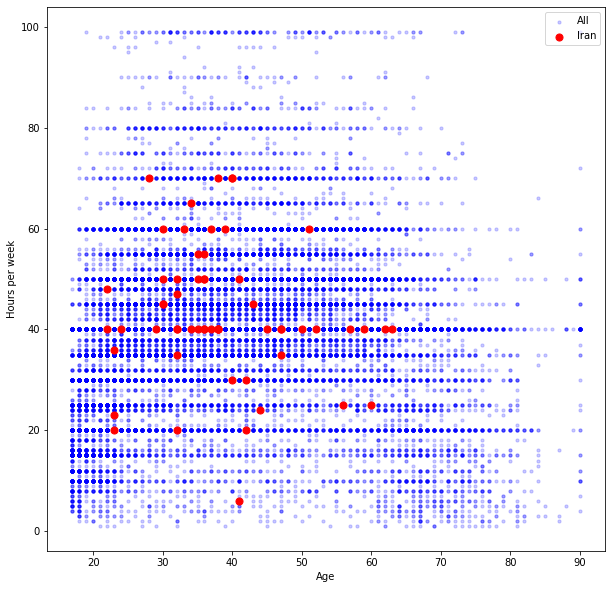

In [2]:
plt.figure(figsize=(10, 10))
plt.scatter(df['age'], df['hours-per-week'], s=10, color='blue', alpha=0.2, label='All')
plt.scatter(df[df['native-country']=='Iran']['age'], df[df['native-country']=='Iran']['hours-per-week'], s=50, color='red', label='Iran')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Hours per week');

In [3]:
col1, col2 = [], []
for c in df['native-country'].unique():
    this_part_of_df = df[df['native-country']==c]
    
    col1.append(c)
    col2.append(100*this_part_of_df[this_part_of_df['race']=='Black'].shape[0]/this_part_of_df.shape[0])
    

In [4]:
df_percentage_of_race_blac = pd.DataFrame(zip(col1, col2), columns=['Country', '% Black'])
df_percentage_of_race_blac = df_percentage_of_race_blac.sort_values(by='% Black', ascending=False)
df_percentage_of_race_blac.head()

,Country,% Black
10,Haiti,96.000000
32,Jamaica,92.452830
38,Trinadad&Tobago,77.777778
39,Outlying-US(Guam-USVI-etc),34.782609
5,Dominican-Republic,17.475728


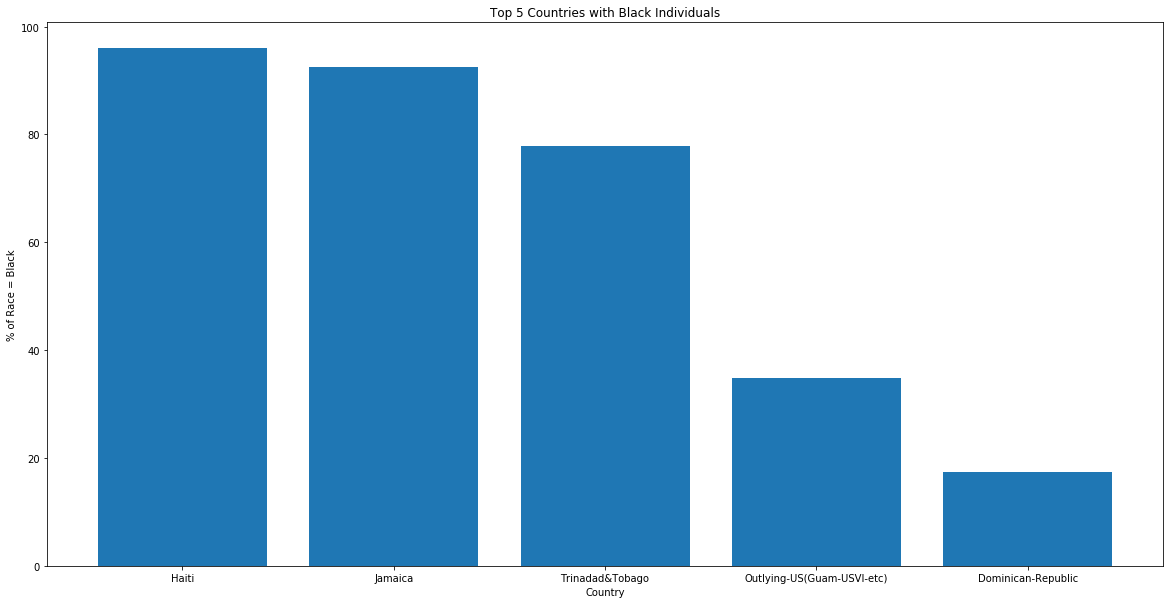

In [5]:
plt.figure(figsize=(20, 10))
plt.bar(df_percentage_of_race_blac['Country'].values[:5], df_percentage_of_race_blac['% Black'].values[:5])
plt.xlabel('Country')
plt.ylabel('% of Race = Black')
plt.title('Top 5 Countries with Black Individuals');